## FYS-STK4155 
## Project 2

### Configure Notebook


In [12]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

# Some more magic so that the notebook will reload external python modules;
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

import os

import matplotlib.colors
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from matplotlib import cm
from matplotlib.ticker import FormatStrFormatter, LinearLocator
from mpl_toolkits.mplot3d import Axes3D
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split, KFold
from sklearn.utils import resample
from tqdm import tqdm_notebook as tqdm
from sklearn.metrics import mean_squared_error

from mylearn.linear_model import LinearRegression, RidgeRegression, GDRegressor
from mylearn.ml_tools import *
from mylearn.project_tools import fig_path

from imageio import imread
from numpy.random import normal, uniform

# Set fontsizes in figures
params = {'axes.labelsize': 'x-large',
          'axes.titlesize': 'x-large',
          'xtick.labelsize': 'x-large',
          'ytick.labelsize': 'x-large',
          'legend.fontsize': 'large',
          'legend.handlelength': 2}
plt.rcParams.update(params)
plt.rc('text', usetex=True)

import warnings
# Comment this to turn on warnings
warnings.filterwarnings('ignore')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Inversion: 2.049129414029747 [2.04912941 2.93803616]
Batch GD: 2.051010543237645 [2.05101054 2.93485505]
Stochastic GD: 2.0612683354376236 [2.06126834 2.88921255]


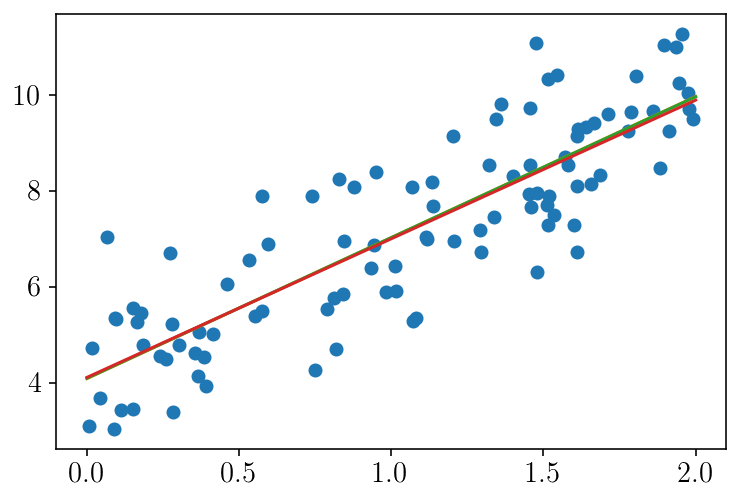

In [16]:
m = 100

# Training data
x = 2 * np.random.rand(m, 1)
y = 4 + 3 * x + np.random.randn(m, 1)
X = np.c_[np.ones((m, 1)), x]

# Test data
xnew = np.array([[0], [2]])
Xnew = np.c_[np.ones((2, 1)), xnew]

# Matrix inversion
inv_reg = GDRegressor(fit_intercept=True)
inv_reg.fit(X, y.ravel(), method="Inv")
ypred_inv = inv_reg.predict(Xnew)
print("Inversion:", inv_reg.intercept_, inv_reg.coef_)

# Batch GD
bgd_reg = GDRegressor(fit_intercept=True)
bgd_reg.fit(X, y.ravel(), method="BGD")
ypred_bgd = bgd_reg.predict(Xnew)
print("Batch GD:", bgd_reg.intercept_, bgd_reg.coef_)

# Stochastic GD
sgd_reg = GDRegressor(fit_intercept=True)
sgd_reg.fit(X, y.ravel(), method="SGD")
ypred_sgd = sgd_reg.predict(Xnew)
print("Stochastic GD:", sgd_reg.intercept_, sgd_reg.coef_)

plt.plot(x, y, "o")
plt.plot(xnew, ypred_inv, "-")
plt.plot(xnew, ypred_bgd, "-")
plt.plot(xnew, ypred_sgd, "-")
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')
plt.show()
